In [29]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [30]:
flt_train_df = pd.read_csv("flt_train.csv")
pax_train_df = pd.read_csv("pax_train.csv")

In [31]:
# Drop index
flt_train_df.drop(flt_train_df.columns[0], axis=1, inplace=True)
pax_train_df.drop(pax_train_df.columns[0], axis=1, inplace=True)

In [32]:
flt_train_df.head()

,FLIGHT_ID,OPERAT_AIRLINE,FLIGHT_NBR,FLIGHT_DEP_DT,FLIGHT_ARVL_DT,LEG_ORIG,LEG_DEST,SCHD_DTM,SCHD_ATM,LEG_DISTANC_MILE_QTY,...,LF,FLEET,SUB_FLEET,ORIG_REGION,DEST_REGION,ORIGN_SUB_REGION,DEST_SUB_REGION,GATE_BAGS,DISTANCE_BIN,FLIGHT_DEP_MONTH
0,2573DFW20191006,AA,2573,10/6/2019,10/6/2019,DFW,XNA,20:38:00,21:51:00,280,...,93.75,319,A19,USA,USA,Hubs,Envoy,1,"(172.737, 401.3]",10
1,1454DFW20191025,AA,1454,10/25/2019,10/25/2019,DFW,CLT,8:39:00,12:11:00,936,...,97.86,321,321,USA,USA,Hubs,Hubs,12,"(853.9, 1080.2]",10
2,2224DFW20190727,AA,2224,7/27/2019,7/28/2019,DFW,PDX,22:35:00,0:30:00,1615,...,91.71,321,32S,USA,USA,Hubs,West,3,"(1532.8, 1759.1]",7
3,2812DFW20190812,AA,2812,8/12/2019,8/12/2019,DFW,ORD,5:22:00,7:45:00,802,...,95.58,321,32S,USA,USA,Hubs,Hubs,24,"(627.6, 853.9]",8
4,1821DFW20190724,AA,1821,7/24/2019,7/24/2019,DFW,LAX,21:31:00,22:43:00,1235,...,99.47,321,321,USA,USA,Hubs,Hubs,13,"(1080.2, 1306.5]",7


In [33]:
pax_train_df.head()

,PNR_LOCTR_ID,PNR_CREATE_DT,PARTY_ID,LYLTY_LEVEL_CD,FARE_CLASS_CD,CABIN,OD_ORIGIN_AIRPRT_IATA_CD,OD_DESTNTN_AIRPRT_IATA_CD,REVNUE_ACCT_SLS_OUTLET_ID,FLIGHT_DEP_DT,...,PRIME_CHANL_TYPE_CD,SECOND_CHANL_TYPE_CD,TERTY_CHANL_TYPE_CD,OD_LEGS,OD_LONG_LEG,OD_GCD,TRIP_ORIGIN,TRIP_DESTNTN,ROUND_TRIP_IND,FLIGHT_ID
0,1290606612,2019-05-20,580856729,R,V,Y,DFW,BOS,4510541,2019-07-21,...,DIRECT,RES,RES,1.0,1562.0,1562.0,DFW,BOS,0.0,2747DFW20190721
1,1260610418,2019-06-15,42918754,NaN,S,Y,YYZ,AUS,4510739,2019-07-24,...,DIRECT,WEB,WEB,2.0,1199.0,1359.0,YTO,AUS,0.0,2707DFW20190724
2,1938323699,2019-01-10,2119496752,R,S,Y,XNA,LAS,4510739,2019-07-24,...,DIRECT,WEB,WEB,2.0,1055.0,1163.0,FYV,LAS,0.0,671DFW20190724
3,-2053377118,2019-07-30,14983830,NaN,Y,Y,CLT,SMF,3410110,2019-08-14,...,DIRECT,RES,RES,2.0,1431.0,2244.0,CLT,SAC,0.0,456DFW20190814
4,-380537054,2019-06-13,2013609590,NaN,B,Y,KOA,AUS,1157862,2019-07-27,...,OTA,OTA,OTA,1.0,190.0,3695.0,KOA,AUS,0.0,1176DFW20190727


In [34]:
flt_train_df.info()
flt_train_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41623 entries, 0 to 41622
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FLIGHT_ID             41623 non-null  object 
 1   OPERAT_AIRLINE        41623 non-null  object 
 2   FLIGHT_NBR            41623 non-null  int64  
 3   FLIGHT_DEP_DT         41623 non-null  object 
 4   FLIGHT_ARVL_DT        41623 non-null  object 
 5   LEG_ORIG              41623 non-null  object 
 6   LEG_DEST              41623 non-null  object 
 7   SCHD_DTM              41623 non-null  object 
 8   SCHD_ATM              41623 non-null  object 
 9   LEG_DISTANC_MILE_QTY  41623 non-null  int64  
 10  SEATS                 41623 non-null  int64  
 11  PAX                   41623 non-null  int64  
 12  LF                    41623 non-null  float64
 13  FLEET                 41623 non-null  int64  
 14  SUB_FLEET             41623 non-null  object 
 15  ORIG_REGION        

(41623, 22)

In [35]:
flt_train_df.isnull().sum()

FLIGHT_ID               0
OPERAT_AIRLINE          0
FLIGHT_NBR              0
FLIGHT_DEP_DT           0
FLIGHT_ARVL_DT          0
LEG_ORIG                0
LEG_DEST                0
SCHD_DTM                0
SCHD_ATM                0
LEG_DISTANC_MILE_QTY    0
SEATS                   0
PAX                     0
LF                      0
FLEET                   0
SUB_FLEET               0
ORIG_REGION             0
DEST_REGION             0
ORIGN_SUB_REGION        0
DEST_SUB_REGION         0
GATE_BAGS               0
DISTANCE_BIN            0
FLIGHT_DEP_MONTH        0
dtype: int64

In [36]:
pax_train_df.info()
pax_train_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5985932 entries, 0 to 5985931
Data columns (total 25 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   PNR_LOCTR_ID               int64  
 1   PNR_CREATE_DT              object 
 2   PARTY_ID                   int64  
 3   LYLTY_LEVEL_CD             object 
 4   FARE_CLASS_CD              object 
 5   CABIN                      object 
 6   OD_ORIGIN_AIRPRT_IATA_CD   object 
 7   OD_DESTNTN_AIRPRT_IATA_CD  object 
 8   REVNUE_ACCT_SLS_OUTLET_ID  object 
 9   FLIGHT_DEP_DT              object 
 10  FLIGHT_ARVL_DT             object 
 11  CITI_IND                   int64  
 12  BARCLAY_IND                int64  
 13  CHILD_IND                  int64  
 14  TRIP_TYPE                  object 
 15  PRIME_CHANL_TYPE_CD        object 
 16  SECOND_CHANL_TYPE_CD       object 
 17  TERTY_CHANL_TYPE_CD        object 
 18  OD_LEGS                    float64
 19  OD_LONG_LEG                float64
 20  OD

(5985932, 25)

In [37]:
#Handling NULLs
pax_train_df.isna().sum()

PNR_LOCTR_ID                       0
PNR_CREATE_DT                  27635
PARTY_ID                           0
LYLTY_LEVEL_CD               2863151
FARE_CLASS_CD                   1774
CABIN                              0
OD_ORIGIN_AIRPRT_IATA_CD       28147
OD_DESTNTN_AIRPRT_IATA_CD      28147
REVNUE_ACCT_SLS_OUTLET_ID      27806
FLIGHT_DEP_DT                      0
FLIGHT_ARVL_DT                     0
CITI_IND                           0
BARCLAY_IND                        0
CHILD_IND                          0
TRIP_TYPE                      27713
PRIME_CHANL_TYPE_CD            48943
SECOND_CHANL_TYPE_CD           48943
TERTY_CHANL_TYPE_CD            48943
OD_LEGS                        28147
OD_LONG_LEG                    28150
OD_GCD                         28369
TRIP_ORIGIN                    28150
TRIP_DESTNTN                   28152
ROUND_TRIP_IND                 27635
FLIGHT_ID                          0
dtype: int64

In [38]:
pax_train_df.shape

(5985932, 25)

In [39]:
pax_train_df_cp = pax_train_df
pax_train_df_cp.head(2)

,PNR_LOCTR_ID,PNR_CREATE_DT,PARTY_ID,LYLTY_LEVEL_CD,FARE_CLASS_CD,CABIN,OD_ORIGIN_AIRPRT_IATA_CD,OD_DESTNTN_AIRPRT_IATA_CD,REVNUE_ACCT_SLS_OUTLET_ID,FLIGHT_DEP_DT,...,PRIME_CHANL_TYPE_CD,SECOND_CHANL_TYPE_CD,TERTY_CHANL_TYPE_CD,OD_LEGS,OD_LONG_LEG,OD_GCD,TRIP_ORIGIN,TRIP_DESTNTN,ROUND_TRIP_IND,FLIGHT_ID
0,1290606612,2019-05-20,580856729,R,V,Y,DFW,BOS,4510541,2019-07-21,...,DIRECT,RES,RES,1.0,1562.0,1562.0,DFW,BOS,0.0,2747DFW20190721
1,1260610418,2019-06-15,42918754,NaN,S,Y,YYZ,AUS,4510739,2019-07-24,...,DIRECT,WEB,WEB,2.0,1199.0,1359.0,YTO,AUS,0.0,2707DFW20190724


In [40]:
# dropping records with NULL value for OD_ORIGIN_AIRPRT_IATA_CD
pax_train_df = pax_train_df.dropna(axis=0, subset=['OD_ORIGIN_AIRPRT_IATA_CD'])

In [41]:
pax_train_df.isna().sum()

PNR_LOCTR_ID                       0
PNR_CREATE_DT                      0
PARTY_ID                           0
LYLTY_LEVEL_CD               2862641
FARE_CLASS_CD                      9
CABIN                              0
OD_ORIGIN_AIRPRT_IATA_CD           0
OD_DESTNTN_AIRPRT_IATA_CD          0
REVNUE_ACCT_SLS_OUTLET_ID        171
FLIGHT_DEP_DT                      0
FLIGHT_ARVL_DT                     0
CITI_IND                           0
BARCLAY_IND                        0
CHILD_IND                          0
TRIP_TYPE                         76
PRIME_CHANL_TYPE_CD            21122
SECOND_CHANL_TYPE_CD           21122
TERTY_CHANL_TYPE_CD            21122
OD_LEGS                            0
OD_LONG_LEG                        3
OD_GCD                           222
TRIP_ORIGIN                        3
TRIP_DESTNTN                       6
ROUND_TRIP_IND                     0
FLIGHT_ID                          0
dtype: int64

In [42]:
pax_train_df_cp1 = pax_train_df

In [43]:
#drop key fields & LYLTY_LEVEL_CD (as lot of null values in this field)
pax_train_df.drop(['PNR_LOCTR_ID','PARTY_ID','LYLTY_LEVEL_CD','REVNUE_ACCT_SLS_OUTLET_ID','PNR_CREATE_DT','FLIGHT_DEP_DT','FLIGHT_ARVL_DT','OD_ORIGIN_AIRPRT_IATA_CD','OD_DESTNTN_AIRPRT_IATA_CD','TERTY_CHANL_TYPE_CD','TRIP_ORIGIN','TRIP_DESTNTN','PNR_CREATE_DT','SECOND_CHANL_TYPE_CD'], axis=1, inplace=True)

In [44]:
pax_train_df.isna().sum()

FARE_CLASS_CD              9
CABIN                      0
CITI_IND                   0
BARCLAY_IND                0
CHILD_IND                  0
TRIP_TYPE                 76
PRIME_CHANL_TYPE_CD    21122
OD_LEGS                    0
OD_LONG_LEG                3
OD_GCD                   222
ROUND_TRIP_IND             0
FLIGHT_ID                  0
dtype: int64

In [45]:
pax_train_df1 = pax_train_df.dropna()

In [46]:
pax_train_df1.shape

(5936374, 12)

In [47]:
pax_train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936374 entries, 0 to 5985931
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FARE_CLASS_CD        object 
 1   CABIN                object 
 2   CITI_IND             int64  
 3   BARCLAY_IND          int64  
 4   CHILD_IND            int64  
 5   TRIP_TYPE            object 
 6   PRIME_CHANL_TYPE_CD  object 
 7   OD_LEGS              float64
 8   OD_LONG_LEG          float64
 9   OD_GCD               float64
 10  ROUND_TRIP_IND       float64
 11  FLIGHT_ID            object 
dtypes: float64(4), int64(3), object(5)
memory usage: 588.8+ MB


In [48]:
flt_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41623 entries, 0 to 41622
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FLIGHT_ID             41623 non-null  object 
 1   OPERAT_AIRLINE        41623 non-null  object 
 2   FLIGHT_NBR            41623 non-null  int64  
 3   FLIGHT_DEP_DT         41623 non-null  object 
 4   FLIGHT_ARVL_DT        41623 non-null  object 
 5   LEG_ORIG              41623 non-null  object 
 6   LEG_DEST              41623 non-null  object 
 7   SCHD_DTM              41623 non-null  object 
 8   SCHD_ATM              41623 non-null  object 
 9   LEG_DISTANC_MILE_QTY  41623 non-null  int64  
 10  SEATS                 41623 non-null  int64  
 11  PAX                   41623 non-null  int64  
 12  LF                    41623 non-null  float64
 13  FLEET                 41623 non-null  int64  
 14  SUB_FLEET             41623 non-null  object 
 15  ORIG_REGION        

In [49]:
import datetime
flt_train_df['FLIGHT_ARVL_MONTH'] = pd.DatetimeIndex(flt_train_df['FLIGHT_ARVL_DT']).month

In [50]:
flt_train_df['FLEET']=flt_train_df['FLEET'].astype(object)

In [51]:
flt_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41623 entries, 0 to 41622
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FLIGHT_ID             41623 non-null  object 
 1   OPERAT_AIRLINE        41623 non-null  object 
 2   FLIGHT_NBR            41623 non-null  int64  
 3   FLIGHT_DEP_DT         41623 non-null  object 
 4   FLIGHT_ARVL_DT        41623 non-null  object 
 5   LEG_ORIG              41623 non-null  object 
 6   LEG_DEST              41623 non-null  object 
 7   SCHD_DTM              41623 non-null  object 
 8   SCHD_ATM              41623 non-null  object 
 9   LEG_DISTANC_MILE_QTY  41623 non-null  int64  
 10  SEATS                 41623 non-null  int64  
 11  PAX                   41623 non-null  int64  
 12  LF                    41623 non-null  float64
 13  FLEET                 41623 non-null  object 
 14  SUB_FLEET             41623 non-null  object 
 15  ORIG_REGION        

In [27]:
#Fare_Class_Code
for flt_train_df['FARE_CLASS_CD'] in ['A','B','D','G','H','I','K','L','M','N','O','P','P','Q','R','S','V','W']:
    flt_train_df['FARE_CLASS_CD']='D'
    
print(flt_train_df['FARE_CLASS_CD'].value_counts(normalize=True))
flt_train_df['FARE_CLASS_CD']

W    1.0
Name: FARE_CLASS_CD, dtype: float64


In [28]:
flt_train_df['FARE_CLASS_CD']

0        W
1        W
2        W
3        W
4        W
        ..
41618    W
41619    W
41620    W
41621    W
41622    W
Name: FARE_CLASS_CD, Length: 41623, dtype: object

In [111]:
flt_train_df.drop(['OPERAT_AIRLINE','FLIGHT_NBR','FLIGHT_DEP_DT','FLIGHT_ARVL_DT','SCHD_DTM','SCHD_ATM','LEG_ORIG','LEG_DEST','DISTANCE_BIN','SUB_FLEET'], axis=1, inplace=True)

In [135]:
jd_train_df = pd.merge(flt_train_df,pax_train_df1 , how='inner', on='FLIGHT_ID')

In [136]:
jd_train_df.shape

(5936374, 27)

In [137]:
jd_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936374 entries, 0 to 5936373
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   FLIGHT_ID             object 
 1   LEG_DISTANC_MILE_QTY  int64  
 2   SEATS                 int64  
 3   PAX                   int64  
 4   LF                    float64
 5   FLEET                 int64  
 6   SUB_FLEET             object 
 7   ORIG_REGION           object 
 8   DEST_REGION           object 
 9   ORIGN_SUB_REGION      object 
 10  DEST_SUB_REGION       object 
 11  GATE_BAGS             int64  
 12  FLIGHT_DEP_MONTH      int64  
 13  FLIGHT_ARVL_MONTH     int64  
 14  PNR_CREATE_DT         object 
 15  FARE_CLASS_CD         object 
 16  CABIN                 object 
 17  CITI_IND              int64  
 18  BARCLAY_IND           int64  
 19  CHILD_IND             int64  
 20  TRIP_TYPE             object 
 21  PRIME_CHANL_TYPE_CD   object 
 22  SECOND_CHANL_TYPE_CD  object 
 23  OD_LEGS

In [138]:
jd_train_df.drop(['FLIGHT_ID'], axis=1, inplace=True)

In [139]:
jd_train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LEG_DISTANC_MILE_QTY,5936374.0,1001.915815,388.254050,175.00,802.00,1017.00,1235.00,2438.0
SEATS,5936374.0,172.268707,21.580563,127.00,181.00,181.00,181.00,196.0
PAX,5936374.0,159.641550,30.187888,6.00,140.00,175.00,181.00,196.0
LF,5936374.0,88.514139,12.334308,4.69,83.98,92.82,97.24,100.0
FLEET,5936374.0,320.615653,0.776734,319.00,321.00,321.00,321.00,321.0
GATE_BAGS,5936374.0,8.924404,7.712702,0.00,2.00,7.00,14.00,49.0
FLIGHT_DEP_MONTH,5936374.0,6.012908,3.133696,1.00,3.00,6.00,9.00,12.0
FLIGHT_ARVL_MONTH,5936374.0,6.014807,3.133221,1.00,3.00,6.00,9.00,12.0
CITI_IND,5936374.0,0.128081,0.334179,0.00,0.00,0.00,0.00,1.0
BARCLAY_IND,5936374.0,0.043722,0.204475,0.00,0.00,0.00,0.00,1.0


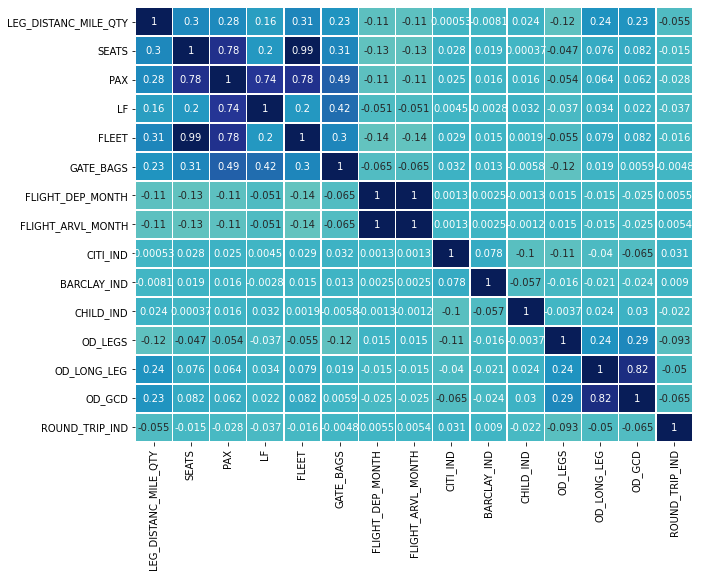

In [141]:
## Correlation betweeen all numeric fields

plt.figure(figsize=(10,8))

sns.heatmap(jd_train_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [142]:
jd_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936374 entries, 0 to 5936373
Data columns (total 25 columns):
 #   Column                Dtype  
---  ------                -----  
 0   LEG_DISTANC_MILE_QTY  int64  
 1   SEATS                 int64  
 2   PAX                   int64  
 3   LF                    float64
 4   FLEET                 int64  
 5   SUB_FLEET             object 
 6   ORIG_REGION           object 
 7   DEST_REGION           object 
 8   ORIGN_SUB_REGION      object 
 9   DEST_SUB_REGION       object 
 10  GATE_BAGS             int64  
 11  FLIGHT_DEP_MONTH      int64  
 12  FLIGHT_ARVL_MONTH     int64  
 13  FARE_CLASS_CD         object 
 14  CABIN                 object 
 15  CITI_IND              int64  
 16  BARCLAY_IND           int64  
 17  CHILD_IND             int64  
 18  TRIP_TYPE             object 
 19  PRIME_CHANL_TYPE_CD   object 
 20  SECOND_CHANL_TYPE_CD  object 
 21  OD_LEGS               float64
 22  OD_LONG_LEG           float64
 23  OD_GCD 

In [164]:
df = pd.get_dummies(jd_train_df,drop_first=True)


In [165]:
df.shape

(5936374, 33)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5936374 entries, 0 to 5936373
Data columns (total 33 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   LEG_DISTANC_MILE_QTY                     int64  
 1   SEATS                                    int64  
 2   PAX                                      int64  
 3   LF                                       float64
 4   GATE_BAGS                                int64  
 5   FLIGHT_DEP_MONTH                         int64  
 6   FLIGHT_ARVL_MONTH                        int64  
 7   CITI_IND                                 int64  
 8   BARCLAY_IND                              int64  
 9   CHILD_IND                                int64  
 10  OD_LEGS                                  float64
 11  OD_LONG_LEG                              float64
 12  OD_GCD                                   float64
 13  ROUND_TRIP_IND                           float64
 14  DEST_REGION_CARIBB

In [167]:
# Separate the independent attributes i.e. every column except Strength
# Store the target column (Strength) into Y array

x = df.loc[:, df.columns != 'GATE_BAGS']  # independent variables
y = df.loc[:, df.columns == 'GATE_BAGS']  # Target variable

In [168]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [169]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4155461, 32), (4155461, 1), (1780913, 32), (1780913, 1))

In [170]:
x_train

,LEG_DISTANC_MILE_QTY,SEATS,PAX,LF,FLIGHT_DEP_MONTH,FLIGHT_ARVL_MONTH,CITI_IND,BARCLAY_IND,CHILD_IND,OD_LEGS,...,DEST_SUB_REGION_South America,DEST_SUB_REGION_West,CABIN_J,CABIN_W,CABIN_Y,TRIP_TYPE_L,PRIME_CHANL_TYPE_CD_DIRECT,PRIME_CHANL_TYPE_CD_LEISURE,PRIME_CHANL_TYPE_CD_OTA,PRIME_CHANL_TYPE_CD_TMC
2812806,984,181,138,75.69,1,1,0,0,1,1.0,...,0,0,0,0,1,1,1,0,0,0
3180032,1615,181,153,82.32,10,10,0,0,0,1.0,...,0,1,0,0,1,1,1,0,0,0
5802672,1046,128,123,94.53,7,7,1,1,0,1.0,...,0,1,0,0,1,1,1,0,0,0
1679347,1046,128,102,75.00,2,2,0,0,1,2.0,...,0,1,0,0,1,1,1,0,0,0
2036749,1121,181,181,95.03,3,3,0,0,0,2.0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758032,868,187,187,81.82,11,11,0,0,0,3.0,...,0,0,0,0,1,1,0,0,1,0
1956982,448,181,173,89.50,6,6,0,0,0,2.0,...,0,0,0,0,1,0,0,0,0,1
5367485,225,150,147,96.67,1,1,0,0,0,2.0,...,0,0,0,0,1,1,0,0,1,0
2115790,1659,187,186,99.47,2,2,0,0,0,1.0,...,0,1,0,0,1,0,0,0,0,1


In [177]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=15)
xgb.fit(x_train, y_train)

Score_XG = xgb.score(x_test, y_test)
pred_xgb = xgb.predict(x_test)
RMSE_XG = mean_squared_error(y_test, pred_xgb)**0.5


print ("Root Mean Squared Error : ",RMSE_XG)
print("Training Score :",xgb.score(x_train, y_train))  # performance on train data
print("Testing Score : ",Score_XG)  # performance on test data

Root Mean Squared Error :  3.246511261190989
Training Score : 0.8550643602436268
Testing Score :  0.8226125535647281
